In [1]:
packages = {
    "requests": "requests",
    "urllib": None,  # Part of the standard library, no need to install
    "types": None,  # Part of the standard library, often no need to install additional packages
    "pandas": "pandas",
    "json": None,  # Part of the standard library, no need to install
    "numpy": "numpy",
    "matplotlib": "matplotlib",
    "os": None  # Part of the standard library, no need to install
}

def install_package(name):
    import subprocess
    import sys
    subprocess.check_call([sys.executable, "-m", "pip", "install", name])

for package, install_name in packages.items():
    if install_name is not None:
        try:
            __import__(package)
        except ImportError:
            print(f"Package {package} not found, installing {install_name}...")
            install_package(install_name)
    else:
        print(f"Package {package} is part of the standard library or not installable via pip.")

import requests
import urllib
import types
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
import os

Package urllib is part of the standard library or not installable via pip.
Package types is part of the standard library or not installable via pip.
Package json is part of the standard library or not installable via pip.
Package os is part of the standard library or not installable via pip.


In [2]:
seen_images = set()

In [3]:
image_folders = ['2024_Streetview_Images'
                , '2023_Streetview_Images'
                , '2022_Streetview_Images'
                , '2021_Streetview_Images'
                , '2020_Streetview_Images'
                , '2019_Streetview_Images'
                , '2018_Streetview_Images'
                , '2017_Streetview_Images'
                , '2016_Streetview_Images']

def populate_screen(folder):
  seen_list = os.listdir('../Dataset/{}'.format(folder))
  for image_name in seen_list:
    if (image_name[-1] == '_'):
        image_name = image_name[:-1]
    loc = image_name.split('_')[0]
    print(loc)
    seen_images.add(loc)

def collect_existing(image_folders):
  for folder in image_folders:
    populate_screen(folder)

In [4]:
collect_existing(image_folders)

36.86919301699279,-121.7624103377959
36.86919301699279,-121.7624103377959
36.86919301699279,-121.7624103377959
36.87085141875854,-121.7625357936546
36.87085141875854,-121.7625357936546
36.87085141875854,-121.7625357936546
36.87094633762481,-121.7625450093948
36.87094633762481,-121.7625450093948
36.87094633762481,-121.7625450093948
36.87176078094009,-121.7710401208757
36.87176078094009,-121.7710401208757
36.87176078094009,-121.7710401208757
36.87187201697716,-121.7698000826037
36.87187201697716,-121.7698000826037
36.87187201697716,-121.7698000826037
36.87313688571738,-121.7620219714705
36.87313688571738,-121.7620219714705
36.87313688571738,-121.7620219714705
36.87553010987745,-121.770677864903
36.87553010987745,-121.770677864903
36.87553010987745,-121.770677864903
36.87560921235836,-121.7709401463425
36.87560921235836,-121.7709401463425
36.87560921235836,-121.7709401463425
36.8792239749521,-121.7714827896477
36.8792239749521,-121.7714827896477
36.8792239749521,-121.7714827896477
36.8802

In [7]:
meta_base = 'https://maps.googleapis.com/maps/api/streetview/metadata?'
pic_base = 'https://maps.googleapis.com/maps/api/streetview?'
api_key = os.environ['API_KEY']
meta_params = {'key': api_key,
               'location': '36.852833,-121.782302'}
pic_params = {'key': api_key,
              'location': '36.852833,-121.782302',
              'size': "640x640",
              'souce': 'outdoors'}

In [8]:
meta = requests.get(meta_base, meta_params)
meta.json()

{'copyright': '© Google',
 'date': '2021-05',
 'location': {'lat': 36.85277500085382, 'lng': -121.7823315385135},
 'pano_id': 'LmAli5-M7Jt4S548oBPwvQ',
 'status': 'OK'}

In [9]:
def image_is_in_season(date):
  year, month = map(int, date.split('-'))
  return (2016 <= year <= 2024) and (5 <= month <= 7)

def verify_meta(meta) -> bool:
    if meta.status_code == 200:
        response_data = meta.json()  # Parse the JSON response
        if response_data.get("status") == "OK":
            return True
        else:
            return False
    else:
        return False

In [10]:
succeeded = set()

In [11]:
# Only run if you haven't cached x.json or y.json
if (not os.path.exists('x.json')):
  bounding_x = [-121.74299923677887, -121.68120114107575]
  bounding_y = [36.756678154805506, 36.77799270841011]

  delta = 0.0015

  for i in np.arange(bounding_y[0], bounding_y[1] + delta, delta):
      for j in np.arange(bounding_x[0], bounding_x[1] + delta, delta):
          meta_params = {'key': api_key,
                        'location': f'{i},{j}'}
          meta_response = requests.get(meta_base, params=meta_params)
          if verify_meta(meta_response):  # Assuming verify_meta is a function defined elsewhere
              lat = meta_response.json()['location']['lat']
              lng = meta_response.json()['location']['lng']
              date = meta_response.json()['date']
              pano_id = meta_response.json()['pano_id']

              if (image_is_in_season(date)):
                succeeded.add((lat, lng))

      print(i)

36.756678154805506
36.758178154805506
36.759678154805506
36.761178154805506
36.762678154805506
36.764178154805506
36.76567815480551
36.76717815480551
36.76867815480551
36.77017815480551
36.77167815480551
36.77317815480551
36.77467815480551
36.77617815480551
36.77767815480551
36.77917815480551


In [12]:
len(succeeded)

23

In [13]:
if (not os.path.exists('x.json')):
    x = [item[0] for item in succeeded]
    y = [item[1] for item in succeeded]
    
    f = open('x.json', 'w')
    json.dump(x, f)
    f.close()

    f = open('y.json', 'w')
    json.dump(y, f)
    f.close()
else:
    f = open('/content/x.json', 'r')
    list1 = json.load(f)
    f.close()
    f = open('/content/y.json', 'r')
    list2 = json.load(f)
    f.close()
    for i in range (len(list1)):
        succeeded.add((list1[i], list2[i]))

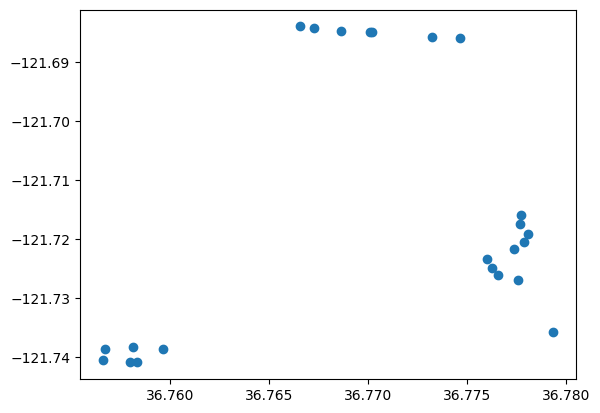

In [14]:
to_list = list(succeeded)
x = [coord[0] for coord in to_list]
y = [coord[1] for coord in to_list]
plt.scatter(x, y)

In [15]:
def route_to_folder(location, bearing, date, pano_id, pic_response):
  year, month = map(int, date.split('-'))
  path_to_folder = "../Dataset/{}_Streetview_Images".format(year)
  with open('{}/{}_{}_{}_{}.jpg'.format(path_to_folder, location, str(int(bearing)), date, pano_id), "wb") as file:
    print("Saved to " + path_to_folder + "/" + location + "_" + str(int(bearing)) + ".jpg")
    file.write(pic_response.content)

def load_streetview(location, bearing=None):

  if (location in seen_images):
    return False

  meta_params = {'key': api_key,
               'location': location}

  if bearing is not None:
    pic_params = {'key': api_key,
                  'location': location,
                  'size': "640x640",
                  'heading': bearing}
  else:
    pic_params = {'key': api_key,
                  'location': location,
                  'size': "640x640"}
  meta_response = requests.get(meta_base, params=meta_params)
  if (verify_meta(meta_response) == False):
    return False
  date = meta_response.json()['date']

  if (not image_is_in_season(date)):
    return False

  pano_id = meta_response.json()['pano_id']
  pic_response = requests.get(pic_base, params=pic_params)

  print(pic_response.headers)

  route_to_folder(location, bearing, date, pano_id, pic_response)
  return True

In [16]:
fail_count = 0
bearings = []
for loc in succeeded:
  print(str(loc[0]) + "," + str(loc[1]))
  res = load_streetview(str(loc[0]) + "," + str(loc[1]), 0)
  if (res == False):
    fail_count += 1
    print(fail_count)

36.77737362863959,-121.7216972311898
{'Content-Type': 'image/jpeg', 'Date': 'Sat, 24 Feb 2024 06:29:31 GMT', 'Expires': 'Sun, 25 Feb 2024 06:29:31 GMT', 'Cache-Control': 'public, max-age=86400', 'Access-Control-Allow-Origin': '*', 'Server': 'scaffolding on HTTPServer2', 'Content-Length': '93714', 'X-XSS-Protection': '0', 'X-Frame-Options': 'SAMEORIGIN', 'Server-Timing': 'gfet4t7; dur=278', 'Alt-Svc': 'h3=":443"; ma=2592000,h3-29=":443"; ma=2592000'}
Saved to ../Dataset/2019_Streetview_Images/36.77737362863959,-121.7216972311898_0.jpg
36.77655150474212,-121.7260888278555
{'Content-Type': 'image/jpeg', 'Date': 'Sat, 24 Feb 2024 06:29:32 GMT', 'Expires': 'Sun, 25 Feb 2024 06:29:32 GMT', 'Cache-Control': 'public, max-age=86400', 'Access-Control-Allow-Origin': '*', 'Server': 'scaffolding on HTTPServer2', 'Content-Length': '75620', 'X-XSS-Protection': '0', 'X-Frame-Options': 'SAMEORIGIN', 'Server-Timing': 'gfet4t7; dur=195', 'Alt-Svc': 'h3=":443"; ma=2592000,h3-29=":443"; ma=2592000'}
Saved 

{'Content-Type': 'image/jpeg', 'Date': 'Sat, 24 Feb 2024 06:29:37 GMT', 'Expires': 'Sun, 25 Feb 2024 06:29:37 GMT', 'Cache-Control': 'public, max-age=86400', 'Access-Control-Allow-Origin': '*', 'Server': 'scaffolding on HTTPServer2', 'Content-Length': '61081', 'X-XSS-Protection': '0', 'X-Frame-Options': 'SAMEORIGIN', 'Server-Timing': 'gfet4t7; dur=167', 'Alt-Svc': 'h3=":443"; ma=2592000,h3-29=":443"; ma=2592000'}
Saved to ../Dataset/2019_Streetview_Images/36.75812966182106,-121.7383968199509_0.jpg
36.77623584697551,-121.7249379582581
{'Content-Type': 'image/jpeg', 'Date': 'Sat, 24 Feb 2024 06:29:38 GMT', 'Expires': 'Sun, 25 Feb 2024 06:29:38 GMT', 'Cache-Control': 'public, max-age=86400', 'Access-Control-Allow-Origin': '*', 'Server': 'scaffolding on HTTPServer2', 'Content-Length': '72294', 'X-XSS-Protection': '0', 'X-Frame-Options': 'SAMEORIGIN', 'Server-Timing': 'gfet4t7; dur=172', 'Alt-Svc': 'h3=":443"; ma=2592000,h3-29=":443"; ma=2592000'}
Saved to ../Dataset/2019_Streetview_Images/